<a href="https://colab.research.google.com/github/tgraydf/nba-points-predictor/blob/main/Basketball_reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Documentation - Basketball Reference scraper](https://github.com/vishaalagartha/basketball_reference_scraper)

# Import libraries

In [ ]:
!pip install basketball_reference_web_scraper

# Documentation
# https://jaebradley.github.io/basketball_reference_web_scraper/api/#methods

     |████████████████████████████████| 146 kB 7.5 MB/s 
     |████████████████████████████████| 58 kB 2.7 MB/s 
     |████████████████████████████████| 5.5 MB 31.4 MB/s 
     |████████████████████████████████| 507 kB 34.9 MB/s 
     |████████████████████████████████| 60 kB 6.9 MB/s 
  Attempting uninstall: idna
    Found existing installation: idna 2.10
    Uninstalling idna-2.10:
      Successfully uninstalled idna-2.10
  Attempting uninstall: certifi
    Found existing installation: certifi 2021.10.8
    Uninstalling certifi-2021.10.8:
      Successfully uninstalled certifi-2021.10.8
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4

In [ ]:
!pip install basketball_reference_scraper

# Documentation
# https://github.com/vishaalagartha/basketball_reference_scraper/blob/master/API.md

     |████████████████████████████████| 49 kB 2.5 MB/s 
     |████████████████████████████████| 241 kB 9.4 MB/s 
     |████████████████████████████████| 509 kB 35.6 MB/s 
     |████████████████████████████████| 20.1 MB 3.1 MB/s 
     |████████████████████████████████| 57 kB 4.8 MB/s 
     |████████████████████████████████| 11.5 MB 12.8 MB/s 
     |████████████████████████████████| 227 kB 37.2 MB/s 
     |████████████████████████████████| 106 kB 7.5 MB/s 
     |████████████████████████████████| 6.3 MB 21.0 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.6
    Uninstalling pytz-2018.6:
      Successfully uninstalled pytz-2018.6
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-dateutil-2.8.2
  Att

In [33]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [34]:
from basketball_reference_web_scraper import client
from basketball_reference_web_scraper.data import OutputType
from basketball_reference_scraper.players import get_stats, get_game_logs, get_player_headshot
from basketball_reference_scraper.box_scores import get_box_scores
from basketball_reference_scraper.seasons import get_schedule, get_standings

# Team level

## Four factors

In [ ]:
# Step 1 - Get NBA Schedule for a particular season

NBA_Schedule = get_schedule(2022, playoffs=False)
NBA_Schedule.head()

,DATE,VISITOR,VISITOR_PTS,HOME,HOME_PTS
0,2021-10-19,Brooklyn Nets,104.0,Milwaukee Bucks,127.0
1,2021-10-19,Golden State Warriors,121.0,Los Angeles Lakers,114.0
2,2021-10-20,Indiana Pacers,122.0,Charlotte Hornets,123.0
3,2021-10-20,Chicago Bulls,94.0,Detroit Pistons,88.0
4,2021-10-20,Boston Celtics,134.0,New York Knicks,138.0


In [ ]:
# Step 2 - Create team dictionary to map the team codes

NBA_Team_Dict = { 'ATLANTA HAWKS' : 'ATL',
                  'ST. LOUIS HAWKS' : 'SLH',
                  'MILWAUKEE HAWKS' : 'MIL',
                  'TRI-CITIES BLACKHAWKS' : 'TCB',
                  'BOSTON CELTICS' : 'BOS',
                  'BROOKLYN NETS' : 'BRK',
                  'NEW JERSEY NETS' : 'NJN',
                  'CHICAGO BULLS' : 'CHI',
                  #'CHARLOTTE HORNETS (1988-2004)': 'CHH',
                  #'CHARLOTTE HORNETS (2014-Present)': 'CHO',
                  'CHARLOTTE HORNETS': 'CHO',
                  'CHARLOTTE BOBCATS' : 'CHA',
                  'CLEVELAND CAVALIERS' : 'CLE',
                  'DALLAS MAVERICKS' : 'DAL',
                  'DENVER NUGGETS' : 'DEN',
                  'DETROIT PISTONS' : 'DET',
                  'FORT WAYNE PISTONS' : 'FWP',
                  'GOLDEN STATE WARRIORS' : 'GSW',
                  'SAN FRANCISCO WARRIORS' : 'SFW',
                  'PHILADELPHIA WARRIORS' : 'PHI',
                  'HOUSTON ROCKETS' : 'HOU',
                  'INDIANA PACERS' : 'IND',
                  'LOS ANGELES CLIPPERS' : 'LAC',
                  'SAN DIEGO CLIPPERS' : 'SDC',
                  'BUFFALO BRAVES' : 'BUF',
                  'LOS ANGELES LAKERS' : 'LAL',
                  'MINNEAPOLIS LAKERS' : 'MIN',
                  'MEMPHIS GRIZZLIES' : 'MEM',
                  'VANCOUVER GRIZZLIES' : 'VAN',
                  'MIAMI HEAT' : 'MIA',
                  'MILWAUKEE BUCKS' : 'MIL',
                  'MINNESOTA TIMBERWOLVES' : 'MIN',
                  'NEW ORLEANS PELICANS' : 'NOP',
                  'NEW ORLEANS/OKLAHOMA CITY HORNETS' : 'NOK',
                  'NEW ORLEANS HORNETS' : 'NOH',
                  'NEW YORK KNICKS' : 'NYK',
                  'OKLAHOMA CITY THUNDER' : 'OKC',
                  'SEATTLE SUPERSONICS' : 'SEA',
                  'ORLANDO MAGIC' : 'ORL',
                  'PHILADELPHIA 76ERS' : 'PHI',
                  'SYRACUSE NATIONALS' : 'SYR',
                  'PHOENIX SUNS' : 'PHO',
                  'PORTLAND TRAIL BLAZERS' : 'POR',
                  'SACRAMENTO KINGS' : 'SAC',
                  'KANSAS CITY KINGS' : 'KCK',
                  'KANSAS CITY-OMAHA KINGS' : 'KCK',
                  'CINCINNATI ROYALS' : 'CIN',
                  'ROCHESTER ROYALS' : 'ROR',
                  'SAN ANTONIO SPURS' : 'SAS',
                  'TORONTO RAPTORS' : 'TOR',
                  'UTAH JAZZ' : 'UTA',
                  'NEW ORLEANS JAZZ' : 'NOJ',
                  'WASHINGTON WIZARDS' : 'WAS',
                  'WASHINGTON BULLETS' : 'WAS',
                  'CAPITAL BULLETS' : 'CAP',
                  'BALTIMORE BULLETS' : 'BAL',
                  'CHICAGO ZEPHYRS' : 'CHI',
                  'CHICAGO PACKERS' : 'CHI',
                  'ANDERSON PACKERS' : 'AND',
                  'CHICAGO STAGS' : 'CHI',
                  'INDIANAPOLIS OLYMPIANS' : 'IND',
                  'SHEBOYGAN RED SKINS' : 'SRS',
                  'ST. LOUIS BOMBERS' : 'SLB',
                  'WASHINGTON CAPITOLS' : 'WAS',
                  'WATERLOO HAWKS' : 'WAT',
                  'SAN DIEGO ROCKETS' : 'SDR' }

In [ ]:
# Step 3 - Insert team codes into NBA Schedule dataframe
NBA_Schedule.insert(2,"V_CODE",NBA_Schedule['VISITOR'].str.upper().map(NBA_Team_Dict))
NBA_Schedule.insert(5,"H_CODE",NBA_Schedule['HOME'].str.upper().map(NBA_Team_Dict))
NBA_Schedule.head()

,DATE,VISITOR,V_CODE,VISITOR_PTS,HOME,H_CODE,HOME_PTS
0,2021-10-19,Brooklyn Nets,BRK,104.0,Milwaukee Bucks,MIL,127.0
1,2021-10-19,Golden State Warriors,GSW,121.0,Los Angeles Lakers,LAL,114.0
2,2021-10-20,Indiana Pacers,IND,122.0,Charlotte Hornets,CHO,123.0
3,2021-10-20,Chicago Bulls,CHI,94.0,Detroit Pistons,DET,88.0
4,2021-10-20,Boston Celtics,BOS,134.0,New York Knicks,NYK,138.0


In [ ]:
pd.options.mode.chained_assignment = None

dfNBA2022Boxscores = pd.DataFrame()
dfTemp = pd.DataFrame()
filt_dict = {'PLAYER':'Team Totals'}
mode = 'ADVANCED'

for i in range(len(NBA_Schedule)):
    date = NBA_Schedule['DATE'][i]
    visitor = NBA_Schedule['V_CODE'][i]
    visitor_pts = NBA_Schedule['VISITOR_PTS'][i]
    visitor_result = ["WIN" if visitor_pts > local_pts else "LOSS"]
    local = NBA_Schedule['H_CODE'][i]
    local_pts = NBA_Schedule['HOME_PTS'][i]
    local_result = ["WIN" if local_pts > visitor_pts else "LOSS"]
    
    dfTemp = get_box_scores(date, visitor, local, stat_type=mode)

    dfTempVisitor = dfTemp[visitor][dfTemp[visitor].PLAYER.isin(filt_dict.values())]
    dfTempVisitor[['RESULT', 'POINTS', 'DATE','TEAM','HOME_GAME','OPPONENT']] = pd.DataFrame([[visitor_result[0], visitor_pts, date, visitor, 'false', local]], index=dfTempVisitor.index)

    dfTempLocal = dfTemp[local][dfTemp[local].PLAYER.isin(filt_dict.values())]
    dfTempLocal[['RESULT', 'POINTS', 'DATE','TEAM','HOME_GAME','OPPONENT']] = pd.DataFrame([[local_result[0],local_pts, date, local, 'true', visitor]], index=dfTempLocal.index)

    dfNBA2022Boxscores = dfNBA2022Boxscores.append(dfTempVisitor, ignore_index = True)
    dfNBA2022Boxscores = dfNBA2022Boxscores.append(dfTempLocal, ignore_index = True)

    print('Game log extraction for ' + date.strftime("%Y-%m-%d") + ' ' + visitor + ' vs ' + local + ' complete.')

NameError: ignored

In [ ]:
dfNBA2022Boxscores.tail()
    

""


In [ ]:
dfNBA2022Boxscores.to_csv('NBA2022Boxscores_23_02_2022.csv')

In [ ]:
len(NBA_Schedule)

1230

In [ ]:
# Load data from csv file
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
# Import data to dataframe
import io
NBA2022Boxscores = pd.read_csv(io.BytesIO(uploaded['NBA2022Boxscores_23_02_2022.csv']))
NBA2022Boxscores.head()

NameError: ignored

In [ ]:
# Check columns and data types
NBA2022Boxscores.dtypes

Unnamed: 0      int64
PLAYER         object
MP              int64
TS%           float64
eFG%          float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%            int64
ORtg          float64
DRtg          float64
BPM           float64
RESULT         object
POINTS          int64
DATE           object
TEAM           object
HOME_GAME        bool
OPPONENT       object
dtype: object

In [ ]:
# Check number of missing values
NBA2022Boxscores.isna().sum() # of missing values

Unnamed: 0       0
PLAYER           0
MP               0
TS%              0
eFG%             0
3PAr             0
FTr              0
ORB%             0
DRB%             0
TRB%             0
AST%             0
STL%             0
BLK%             0
TOV%             0
USG%             0
ORtg             0
DRtg             0
BPM           1766
RESULT           0
POINTS           0
DATE             0
TEAM             0
HOME_GAME        0
OPPONENT         0
dtype: int64

In [ ]:
# Drop unnecessary columns (index, player, USG%, BPM)
NBA2022Boxscores = NBA2022Boxscores.drop(NBA2022Boxscores.columns[[0, 1, 14, 17]], axis=1)
NBA2022Boxscores.head()

,MP,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,RESULT,POINTS,DATE,TEAM,HOME_GAME,OPPONENT
0,240,0.552,0.542,0.381,0.274,10.9,75.0,44.9,51.4,2.9,15.0,11.3,102.1,124.7,LOSS,104,2021-10-19,BRK,False,MIL
1,240,0.562,0.538,0.429,0.171,25.0,89.1,55.1,52.1,7.9,17.3,5.8,124.7,102.1,WIN,127,2021-10-19,MIL,True,BRK
2,240,0.570,0.516,0.419,0.323,18.4,89.1,52.6,73.2,8.0,3.8,13.8,107.3,101.1,LOSS,121,2021-10-19,GSW,False,LAL
3,240,0.551,0.553,0.442,0.200,10.9,81.6,47.4,46.7,6.2,7.4,14.1,101.1,107.3,LOSS,114,2021-10-19,LAL,True,GSW
4,240,0.607,0.561,0.522,0.267,19.0,78.2,52.6,69.0,1.8,13.2,13.7,112.2,113.2,WIN,122,2021-10-20,IND,False,CHO


In [ ]:
# Change date column from object to datetime
NBA2022Boxscores['DATE'] = pd.to_datetime(NBA2022Boxscores['DATE'])

In [ ]:
NBA2022Boxscores.TEAM.sort_values().unique()

array(['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
       'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS',
       'TOR', 'UTA', 'WAS'], dtype=object)

In [ ]:
# Transform categorical variables to numerical values (RESULT, HOME_GAME, TEAM, OPPONENT) = 0)
NBA2022Boxscores['RESULT'] = NBA2022Boxscores['RESULT'].map({"LOSS" : 0, "WIN" : 1})
NBA2022Boxscores['HOME_GAME'] = NBA2022Boxscores['HOME_GAME'].map({False : 0, True : 1})
NBA2022Boxscores['TEAM'] = NBA2022Boxscores['TEAM'].map({"ATL" : 1, "BOS" : 2, "BRK" : 3, "CHI" : 4, "CHO" : 5, "CLE" : 6, "DAL" : 7, "DEN" : 8
                                                         , "DET" : 9, "GSW" : 10, "HOU" : 11, "IND" : 12, "LAC" : 13, "LAL" : 14, "MEM" : 15, "MIA" : 16
                                                         , "MIL" : 17, "MIN" : 18, "NOP" : 19, "NYK" : 20, "OKC" : 21, "ORL" : 22, "PHI" : 23, "PHO" : 24
                                                         , "POR" : 25, "SAC" : 26, "SAS" : 27, "TOR" : 28, "UTA" : 29, "WAS" : 30})
NBA2022Boxscores['OPPONENT'] = NBA2022Boxscores['OPPONENT'].map({"ATL" : 1, "BOS" : 2, "BRK" : 3, "CHI" : 4, "CHO" : 5, "CLE" : 6, "DAL" : 7, "DEN" : 8
                                                         , "DET" : 9, "GSW" : 10, "HOU" : 11, "IND" : 12, "LAC" : 13, "LAL" : 14, "MEM" : 15, "MIA" : 16
                                                         , "MIL" : 17, "MIN" : 18, "NOP" : 19, "NYK" : 20, "OKC" : 21, "ORL" : 22, "PHI" : 23, "PHO" : 24
                                                         , "POR" : 25, "SAC" : 26, "SAS" : 27, "TOR" : 28, "UTA" : 29, "WAS" : 30})
NBA2022Boxscores.head()

,MP,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,RESULT,POINTS,DATE,TEAM,HOME_GAME,OPPONENT
0,240,0.552,0.542,0.381,0.274,10.9,75.0,44.9,51.4,2.9,15.0,11.3,102.1,124.7,0,104,2021-10-19,3,0,17
1,240,0.562,0.538,0.429,0.171,25.0,89.1,55.1,52.1,7.9,17.3,5.8,124.7,102.1,1,127,2021-10-19,17,1,3
2,240,0.570,0.516,0.419,0.323,18.4,89.1,52.6,73.2,8.0,3.8,13.8,107.3,101.1,0,121,2021-10-19,10,0,14
3,240,0.551,0.553,0.442,0.200,10.9,81.6,47.4,46.7,6.2,7.4,14.1,101.1,107.3,0,114,2021-10-19,14,1,10
4,240,0.607,0.561,0.522,0.267,19.0,78.2,52.6,69.0,1.8,13.2,13.7,112.2,113.2,1,122,2021-10-20,12,0,5


In [ ]:
# Visualise summary statistics
NBA2022Boxscores.describe()

,MP,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,RESULT,POINTS,TEAM,HOME_GAME,OPPONENT
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000
mean,241.302378,0.561053,0.527398,0.400975,0.244110,23.047395,76.953398,50.000849,60.372990,7.787316,9.104813,11.911891,111.589921,111.589921,0.494337,109.194224,15.474519,0.500000,15.474519
std,6.711562,0.061444,0.065650,0.072699,0.083542,7.169715,7.169597,5.196741,9.200624,2.795597,4.396361,3.220743,11.743229,11.743229,0.500110,12.331823,8.641043,0.500142,8.641043
min,240.000000,0.369000,0.337000,0.174000,0.053000,2.100000,52.100000,32.900000,27.600000,0.000000,0.000000,1.800000,75.700000,75.700000,0.000000,75.000000,1.000000,0.000000,1.000000
25%,240.000000,0.518000,0.483000,0.350000,0.184000,18.000000,72.325000,46.600000,54.100000,6.000000,6.000000,9.600000,103.725000,103.725000,0.000000,101.000000,8.000000,0.000000,8.000000
50%,240.000000,0.558000,0.524000,0.400000,0.237000,22.900000,77.100000,50.000000,60.500000,7.500000,8.800000,11.700000,111.500000,111.500000,0.000000,109.000000,15.000000,0.500000,15.000000
75%,240.000000,0.602750,0.570000,0.451000,0.299000,27.675000,82.000000,53.400000,66.700000,9.500000,11.900000,14.000000,119.175000,119.175000,1.000000,117.000000,23.000000,1.000000,23.000000
max,315.000000,0.799000,0.795000,0.630000,0.539000,47.900000,97.900000,67.100000,87.800000,19.500000,29.200000,24.400000,159.300000,159.300000,1.000000,158.000000,30.000000,1.000000,30.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c504acd50>,
      dtype=object)

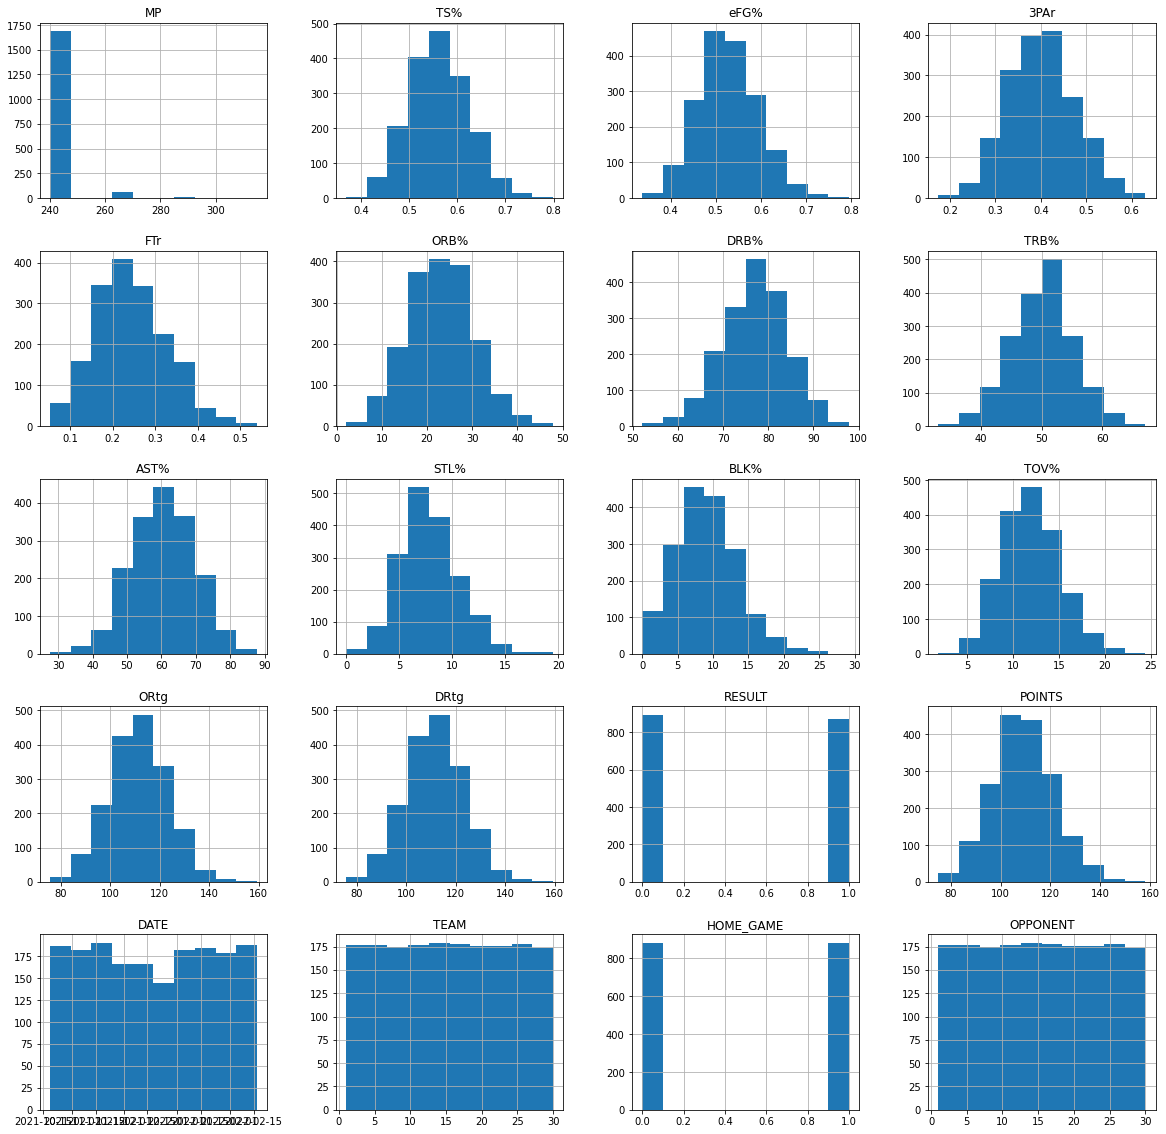

In [ ]:
# Plot histograms
NBA2022Boxscores.hist(figsize=(20,20))

In [ ]:
# Four Factors Are:
# Effective Field Goal Percentage (eFG%) = (Field Goals Made) + 0.5*3P Field Goals Made)) / (Field Goal Attempts)
# Turnover Rate (TOV%) = Turnovers/(Field Goal Attempts + 0.44*Free Throw Attempts + Turnovers)
# Offensive Rebounding Percentage (ORB%) = (Offensive Rebounds)/[(Offensive Rebounds)+(Opponent’s Defensive Rebounds)]
# Free Throw Rate (FTr) = (Free Throws Made)/(Field Goals Attempted) or Free Throws Attempted/Field Goals Attempted

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


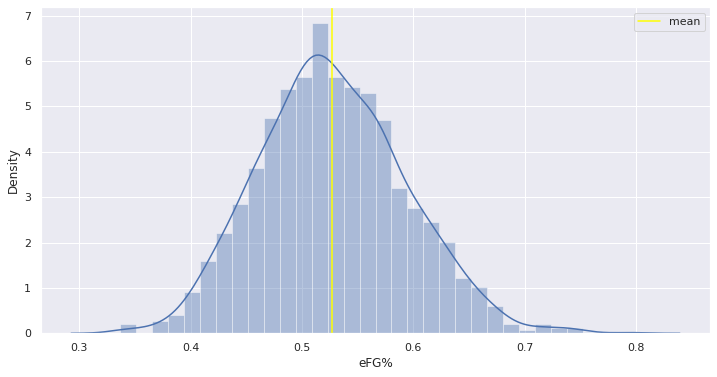

In [ ]:
# Histogram for eFG%
sns.set(rc = {'figure.figsize':(12,6)})
sns.distplot(NBA2022Boxscores['eFG%'])
plt.axvline(np.mean(NBA2022Boxscores['eFG%']),c = 'yellow', ls = '-', label = 'mean')
plt.legend()

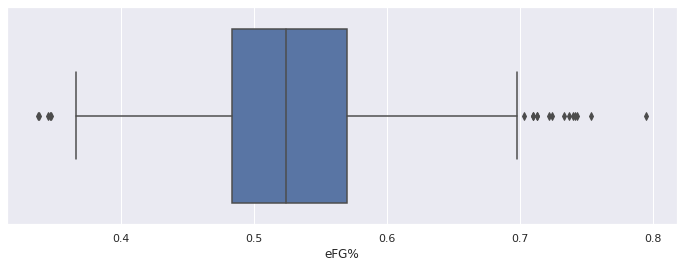

In [ ]:
# Boxplot for eFG%
sns.set(rc = {'figure.figsize':(12,4)})
sns.boxplot(x= NBA2022Boxscores['eFG%'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


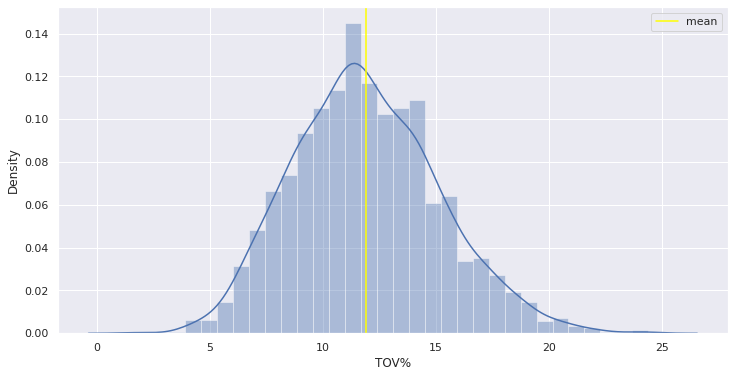

In [ ]:
# Histogram for TOV%
sns.set(rc = {'figure.figsize':(12,6)})
sns.distplot(NBA2022Boxscores['TOV%'])
plt.axvline(np.mean(NBA2022Boxscores['TOV%']),c = 'yellow', ls = '-', label = 'mean')
plt.legend()

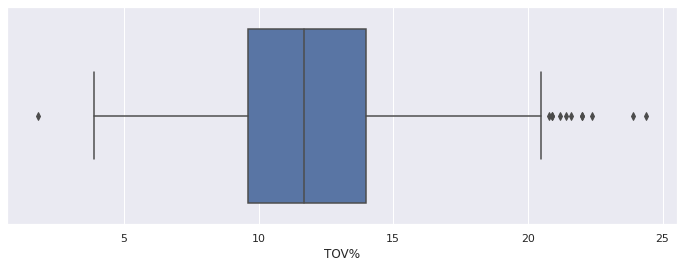

In [ ]:
# Boxplot for TOV%
sns.set(rc = {'figure.figsize':(12,4)})
sns.boxplot(x= NBA2022Boxscores['TOV%'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


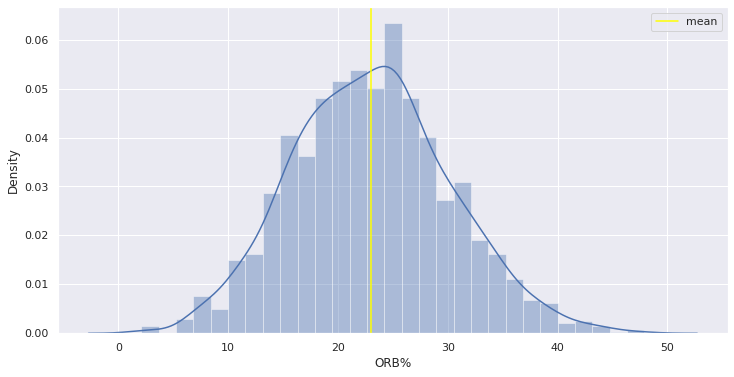

In [ ]:
# Histogram for ORB%
sns.set(rc = {'figure.figsize':(12,6)})
sns.distplot(NBA2022Boxscores['ORB%'])
plt.axvline(np.mean(NBA2022Boxscores['ORB%']),c = 'yellow', ls = '-', label = 'mean')
plt.legend()

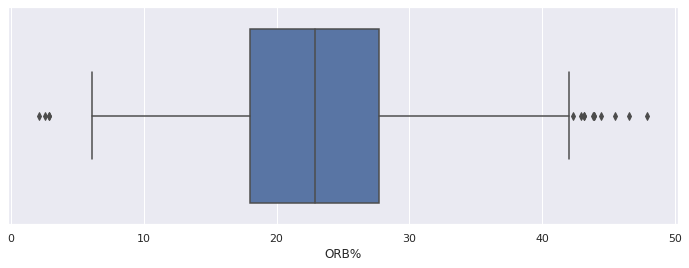

In [ ]:
# Boxplot for ORB%
sns.set(rc = {'figure.figsize':(12,4)})
sns.boxplot(x= NBA2022Boxscores['ORB%'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


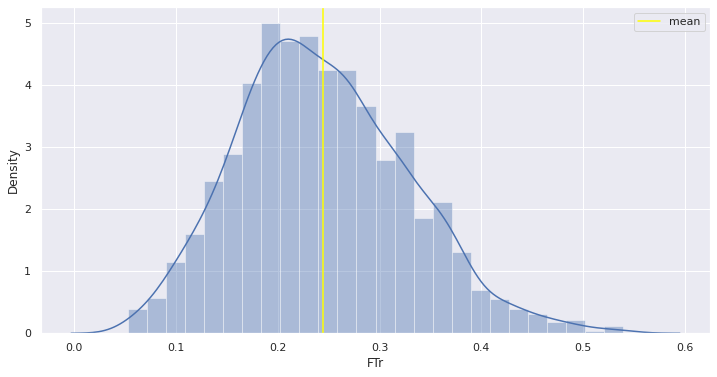

In [ ]:
# Histogram for FTr
sns.set(rc = {'figure.figsize':(12,6)})
sns.distplot(NBA2022Boxscores['FTr'])
plt.axvline(np.mean(NBA2022Boxscores['FTr']),c = 'yellow', ls = '-', label = 'mean')
plt.legend()

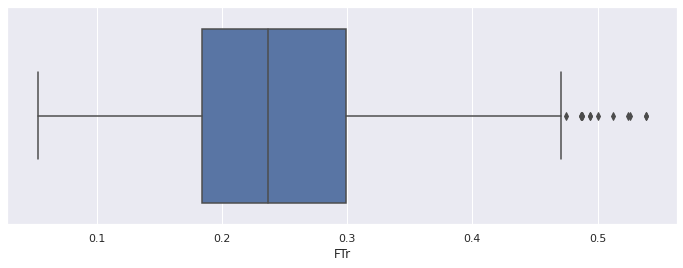

In [ ]:
# Boxplot for FTr
sns.set(rc = {'figure.figsize':(12,4)})
sns.boxplot(x= NBA2022Boxscores['FTr'])

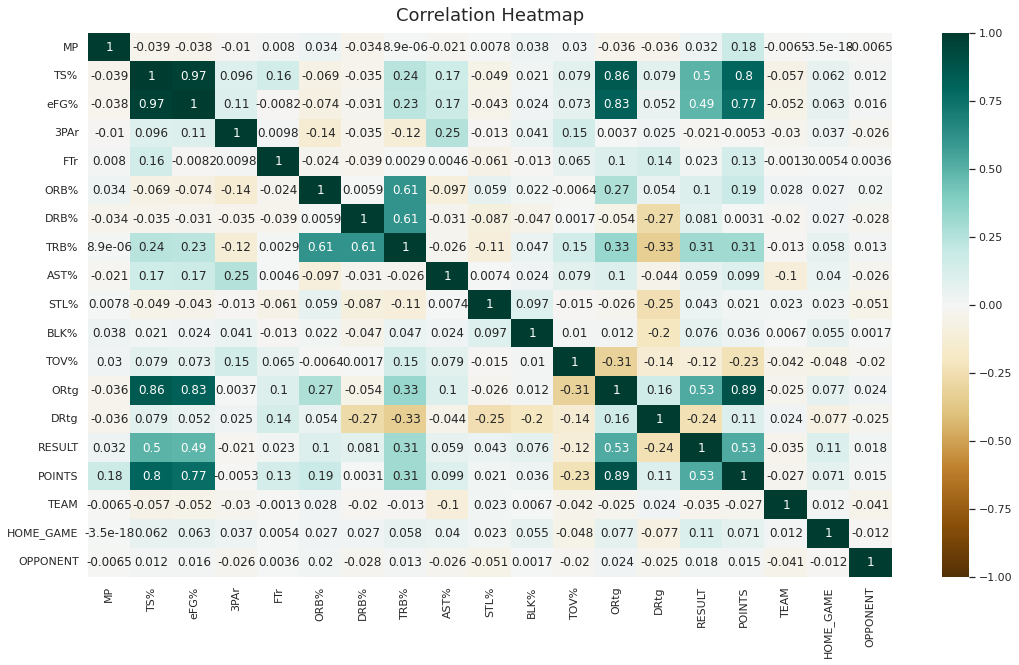

In [ ]:
# Correlation heatmap
plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(NBA2022Boxscores.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
# Let's see how a predictive model performs using the four factors
NBA2022FourFactors = NBA2022Boxscores[['POINTS','eFG%','FTr','ORB%','TOV%']].copy()
NBA2022FourFactors.head()

,POINTS,eFG%,FTr,ORB%,TOV%
0,104,0.542,0.274,10.9,11.3
1,127,0.538,0.171,25.0,5.8
2,121,0.516,0.323,18.4,13.8
3,114,0.553,0.200,10.9,14.1
4,122,0.561,0.267,19.0,13.7


In [ ]:
# Now it's time to treat the outliers. I will not remove them, I will rather assign them the value of percentiles 10 and 90.

In [ ]:
# Get bounds for made_field_goals
mfg_lower_bound, mfg_upper_bound = outlierdetect(NBA_data_new['made_field_goals'])
print("Lower bound for made_field_goals", mfg_lower_bound)
print("Upper bound for made_field_goals", mfg_upper_bound)

In [ ]:
NBA_Schedule.insert(2,"VISITOR_CD",NBA_Schedule['VISITOR'].str.upper().map(NBA_Team_Dict))
NBA_Schedule.head()

,DATE,VISITOR,VISITOR_CD,VISITOR_PTS,HOME,HOME_PTS,VISITOR_CODE
0,2021-10-19,Brooklyn Nets,BRK,104.0,Milwaukee Bucks,127.0,BRK
1,2021-10-19,Golden State Warriors,GSW,121.0,Los Angeles Lakers,114.0,GSW
2,2021-10-20,Indiana Pacers,IND,122.0,Charlotte Hornets,123.0,IND
3,2021-10-20,Chicago Bulls,CHI,94.0,Detroit Pistons,88.0,CHI
4,2021-10-20,Boston Celtics,BOS,134.0,New York Knicks,138.0,BOS


TypeError: ignored

In [ ]:
d = get_box_scores('2021-10-19', 'BRK', 'MIL', stat_type='ADVANCED')

filt_dict = {'PLAYER':'Team Totals'}

d['BRK'][d['BRK'].PLAYER.isin(filt_dict.values())]

,PLAYER,MP,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM
15,Team Totals,240,.552,.542,.381,.274,10.9,75.0,44.9,51.4,2.9,15.0,11.3,100.0,102.1,124.7,NaN


## PCA

In [40]:
PCAboxscores2022 = pd.read_csv ('NBA2022BoxscoresLocal.csv')

In [42]:
PCAboxscores2022.head()

,Unnamed: 0,PLAYER,MP,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,...,USG%,ORtg,DRtg,BPM,RESULT,POINTS,DATE,TEAM,HOME_GAME,OPPONENT
0,0,Team Totals,240,0.552,0.542,0.381,0.274,10.9,75.0,44.9,...,100,102.1,124.7,NaN,LOSS,104,2021-10-19,BRK,False,MIL
1,1,Team Totals,240,0.562,0.538,0.429,0.171,25.0,89.1,55.1,...,100,124.7,102.1,NaN,WIN,127,2021-10-19,MIL,True,BRK
2,2,Team Totals,240,0.570,0.516,0.419,0.323,18.4,89.1,52.6,...,100,107.3,101.1,NaN,LOSS,121,2021-10-19,GSW,False,LAL
3,3,Team Totals,240,0.551,0.553,0.442,0.200,10.9,81.6,47.4,...,100,101.1,107.3,NaN,LOSS,114,2021-10-19,LAL,True,GSW
4,4,Team Totals,240,0.607,0.561,0.522,0.267,19.0,78.2,52.6,...,100,112.2,113.2,NaN,WIN,122,2021-10-20,IND,False,CHO


# Player level

Here I am getting the data from one player (just to see wich variables we have)

## Per game stats

In [ ]:
lebron_per_game = get_stats('Lebron James', stat_type='PER_GAME', playoffs=False, career=False)
lebron_per_game

You searched for "Lebron James"
5 results found.


,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,39.5,7.9,18.9,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,42.4,9.9,21.1,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,42.5,11.1,23.1,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,40.9,9.9,20.8,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,40.4,10.6,21.9,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,37.7,9.7,19.9,...,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,39.0,10.1,20.1,...,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,38.8,9.6,18.8,...,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,37.5,10.0,18.9,...,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,37.9,10.1,17.8,...,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8


## Per minute stats

In [ ]:
lebron_per_minute = get_stats('Lebron James', stat_type='PER_MINUTE', playoffs=False, career=False)
lebron_per_minute

You searched for "Lebron James"
5 results found.


,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,3122.0,7.2,17.2,...,0.754,1.1,3.8,5.0,5.4,1.5,0.7,3.1,1.7,19.1
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,3388.0,8.4,17.9,...,0.750,1.2,5.1,6.2,6.1,1.9,0.6,2.8,1.6,23.1
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,3361.0,9.4,19.5,...,0.738,0.8,5.2,6.0,5.6,1.3,0.7,2.8,1.9,26.5
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,3190.0,8.7,18.3,...,0.698,0.9,5.0,5.9,5.3,1.4,0.6,2.8,1.9,24.1
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,3027.0,9.4,19.5,...,0.712,1.6,5.5,7.0,6.4,1.6,1.0,3.0,2.0,26.8
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,3054.0,9.3,19.0,...,0.780,1.2,6.0,7.2,6.9,1.6,1.1,2.8,1.6,27.2
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,2966.0,9.3,18.5,...,0.767,0.9,5.9,6.7,7.9,1.5,0.9,3.2,1.4,27.4
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,3063.0,8.9,17.5,...,0.759,0.9,6.0,6.9,6.5,1.5,0.6,3.3,1.9,24.8
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,2326.0,9.6,18.1,...,0.771,1.5,6.2,7.6,6.0,1.8,0.8,3.3,1.5,26.0
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,2877.0,9.6,16.9,...,0.753,1.2,6.4,7.6,6.9,1.6,0.8,2.8,1.4,25.5


## Per Poss stats

In [ ]:
lebron_per_poss = get_stats('Lebron James', stat_type='PER_POSS', playoffs=False, career=False)
lebron_per_poss

You searched for "Lebron James"
5 results found.


,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,3122.0,10.5,25.3,...,7.3,7.9,2.2,1.0,4.6,2.5,28.0,NaN,99.0,104.0
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,3388.0,12.6,26.6,...,9.3,9.1,2.8,0.8,4.1,2.3,34.3,NaN,114.0,103.0
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,3361.0,13.9,29.0,...,8.8,8.3,2.0,1.0,4.1,2.9,39.4,NaN,115.0,104.0
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,3190.0,12.8,26.9,...,8.7,7.8,2.1,0.9,4.1,2.8,35.3,NaN,112.0,100.0
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,3027.0,14.0,28.9,...,10.4,9.5,2.4,1.4,4.5,2.9,39.6,NaN,116.0,104.0
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,3054.0,14.0,28.6,...,10.9,10.4,2.4,1.6,4.3,2.5,40.8,NaN,122.0,99.0
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,2966.0,13.6,27.1,...,9.8,11.5,2.2,1.4,4.6,2.1,40.0,NaN,121.0,102.0
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,3063.0,13.1,25.6,...,10.2,9.6,2.1,0.9,4.9,2.8,36.4,NaN,116.0,102.0
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,2326.0,14.1,26.4,...,11.1,8.8,2.6,1.1,4.8,2.2,38.1,NaN,118.0,97.0
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,2877.0,14.1,24.9,...,11.2,10.1,2.4,1.2,4.2,2.0,37.5,NaN,125.0,101.0


## Advanced stats

In [ ]:
lebron_advanced = get_stats('Lebron James', stat_type='ADVANCED', playoffs=False, career=False)
lebron_advanced

You searched for "Lebron James"
5 results found.


,SEASON,AGE,TEAM,LEAGUE,POS,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,2003-04,19.0,CLE,NBA,SG,79.0,3122.0,18.3,0.488,0.145,...,NaN,2.4,2.6,5.1,0.078,NaN,2.3,-0.6,1.7,2.9
1,2004-05,20.0,CLE,NBA,SF,80.0,3388.0,25.7,0.554,0.183,...,NaN,9.7,4.6,14.3,0.203,NaN,7.0,1.7,8.6,9.1
2,2005-06,21.0,CLE,NBA,SF,79.0,3361.0,28.1,0.568,0.208,...,NaN,12.0,4.3,16.3,0.232,NaN,7.5,1.6,9.1,9.4
3,2006-07,22.0,CLE,NBA,SF,78.0,3190.0,24.5,0.552,0.191,...,NaN,8.0,5.7,13.7,0.206,NaN,5.9,2.2,8.1,8.1
4,2007-08,23.0,CLE,NBA,SF,75.0,3027.0,29.1,0.568,0.219,...,NaN,10.7,4.6,15.2,0.242,NaN,8.2,2.6,10.9,9.8
5,2008-09,24.0,CLE,NBA,SF,81.0,3054.0,31.7,0.591,0.238,...,NaN,13.7,6.5,20.3,0.318,NaN,9.5,3.7,13.2,11.8
6,2009-10,25.0,CLE,NBA,SF,76.0,2966.0,31.1,0.604,0.253,...,NaN,13.3,5.2,18.5,0.299,NaN,9.1,2.8,11.8,10.3
7,2010-11,26.0,MIA,NBA,SF,79.0,3063.0,27.3,0.594,0.188,...,NaN,10.3,5.3,15.6,0.244,NaN,6.3,1.8,8.1,7.8
8,2011-12,27.0,MIA,NBA,SF,62.0,2326.0,30.7,0.605,0.127,...,NaN,10.0,4.5,14.5,0.298,NaN,8.2,2.7,10.9,7.6
9,2012-13,28.0,MIA,NBA,PF,76.0,2877.0,31.6,0.640,0.188,...,NaN,14.6,4.7,19.3,0.322,NaN,9.3,2.4,11.7,9.9


## Gamelogs
You can select by player, date and if playoffs are included

In [ ]:
lebron_this_season = get_game_logs('Lebron James', '2021-10-16', '2022-06-16', playoffs=False)
lebron_this_season.head()

You searched for "Lebron James"
5 results found.


,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
0,2021-10-19,36-293,LAL,HOME,GSW,L (-7),1,36:44,13,23,...,10,11,5,1,1,4,5,34,24.8,-2
1,2021-10-22,36-296,LAL,HOME,PHO,L (-10),1,36:32,8,18,...,2,2,5,2,0,5,4,25,15.1,-6
2,2021-10-24,36-298,LAL,HOME,MEM,W (+3),1,40:18,7,19,...,6,6,6,2,2,3,1,19,14.1,-1
5,2021-10-29,36-303,LAL,HOME,CLE,W (+12),1,37:57,10,22,...,2,3,8,3,1,7,1,26,17.8,+9
6,2021-10-31,36-305,LAL,HOME,HOU,W (+10),1,34:32,6,19,...,6,7,8,4,1,2,0,15,14.5,+7


In [ ]:
lebron_this_season['Name'] = 'Lebron James'
lebron_this_season.head()

,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-,Name
0,2021-10-19,36-293,LAL,HOME,GSW,L (-7),1,36:44,13,23,...,11,5,1,1,4,5,34,24.8,-2,Lebron James
1,2021-10-22,36-296,LAL,HOME,PHO,L (-10),1,36:32,8,18,...,2,5,2,0,5,4,25,15.1,-6,Lebron James
2,2021-10-24,36-298,LAL,HOME,MEM,W (+3),1,40:18,7,19,...,6,6,2,2,3,1,19,14.1,-1,Lebron James
5,2021-10-29,36-303,LAL,HOME,CLE,W (+12),1,37:57,10,22,...,3,8,3,1,7,1,26,17.8,+9,Lebron James
6,2021-10-31,36-305,LAL,HOME,HOU,W (+10),1,34:32,6,19,...,7,8,4,1,2,0,15,14.5,+7,Lebron James


In [ ]:
harden_this_season = get_game_logs('James Harden', '2021-10-16', '2022-06-16', playoffs=False)
harden_this_season['Name'] = 'James Harden'
harden_this_season.head()

You searched for "James Harden"
11 results found.


,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-,Name
0,2021-10-19,32-054,BRK,AWAY,MIL,L (-23),1,30:38,6,16,...,8,8,1,2,4,3,20,17.6,-20,James Harden
1,2021-10-22,32-057,BRK,AWAY,PHI,W (+5),1,38:25,7,17,...,7,8,2,0,5,0,20,15.6,-1,James Harden
2,2021-10-24,32-059,BRK,HOME,CHO,L (-16),1,33:09,6,16,...,7,8,1,1,8,5,15,6.4,-15,James Harden
3,2021-10-25,32-060,BRK,HOME,WAS,W (+14),1,30:25,5,17,...,6,9,1,1,2,1,14,11.9,+6,James Harden
4,2021-10-27,32-062,BRK,HOME,MIA,L (-13),1,35:36,4,12,...,7,7,1,1,4,3,14,10.7,-12,James Harden


In [ ]:
pd.concat([lebron_this_season, harden_this_season])

In [ ]:
current_players = client.players_season_totals(2022)
current_players = pd.DataFrame (current_players)
current_players = current_players.name

In [ ]:
for i in current_players:
  gamelog_players = get_game_logs(i, '2021-10-16', '2022-06-16', playoffs=True)
  gamelog_players['Name'] = i

## Players features
From the source we could identify 61 features for players


In [ ]:
players_features = []
col = [lebron_this_season.columns, lebron_advanced.columns, lebron_per_game.columns, lebron_per_minute.columns, lebron_per_poss.columns]
for c in col:
  for i in lebron_per_poss.columns:
    players_features += [i]

In [ ]:
# Removing any duplicates from the list and sorting it
players_features = list(dict.fromkeys(players_features))
players_features.sort()
print(players_features)
print(len(players_features))


['2P', '2P%', '2PA', '3P', '3P%', '3PA', 'AGE', 'AST', 'BLK', 'DRB', 'DRtg', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'G', 'GS', 'LEAGUE', 'MP', 'ORB', 'ORtg', 'PF', 'POS', 'PTS', 'SEASON', 'STL', 'TEAM', 'TOV', 'TRB', 'Unnamed: 29']
32
